In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

In [3]:
# Enum for coordinate system
from enum import Enum
class Coordinate(Enum):
    CIRCULAR = 1
    LINEAR = 0
    HYPERBOLIC = -1

In [4]:
# Rotation mode
def rot(x_init, y_init, z_init, c_mode, max_iterations):
    # Get initial x, y, z values
    x_prev, y_prev, z_prev = x_init, y_init, z_init
    x_values, y_values, z_values = [], [], []
    # Iterate the given number of times
    for i in range(max_iterations):
        # Choose binary direction variable (xi) based on previous iteration
        dir = 1 if (np.sign(z_prev)) > -1 else -1
        
        # Compute value to be added to angle accumulator
        if c_mode == Coordinate.CIRCULAR:
            e = math.degrees(math.atan(1/(1 << i)))
        elif c_mode == Coordinate.LINEAR:
            e = 1/(1 << i)
        elif c_mode == Coordinate.HYPERBOLIC:
            if i == 0:
                i = 1
            e = math.atanh(1/(1 << i))

        # Unified CORDIC Algorithm from Andraka (1998)
        x = x_prev - c_mode.value * y_prev * dir * (1/(1 << i))
        y = y_prev + x_prev * dir * (1/(1 << i))
        z = z_prev - dir * e

        # Update value list and prepare for next iteration
        x_prev, y_prev, z_prev = x, y, z

        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    # Return list of values
    return (x_values, y_values, z_values)

In [6]:
# Compute magnitude-change factor
k = 1
for i in range(0, 100, 2):
    k *= math.sqrt(1 + (1/(1 << i)))
print(k)
# Set up initial x, y, accumulator values
x_init = 1/k
y_init = 0
z_init = 45
coordinate = Coordinate.CIRCULAR
max_iter = 20

results = rot(x_init, y_init, z_init, coordinate, max_iter)
print(results)

1.6467602581210654
([0.6072529350088813, 0.30362646750444067, 0.5313463181327711, 0.6357179163374226, 0.6837525723293361, 0.7065282637699463, 0.7175822459295437, 0.7121415009756934, 0.709399229626517, 0.7080226607434558, 0.7073330232302744, 0.7069878668621702, 0.7071605293668894, 0.7070742191844102, 0.7071173795444063, 0.7070958006814366, 0.7071065904421987, 0.707111985240263, 0.7071092878618104, 0.7071079391674392], [0.6072529350088813, 0.910879402513322, 0.8349727856372118, 0.7685544958706154, 0.7288221260995265, 0.7074548582142347, 0.6964153540928293, 0.7020214653891539, 0.7048032681273402, 0.7061888134977045, 0.7068802418773368, 0.707225619330086, 0.7070530148704028, 0.7071393381772103, 0.707096181791762, 0.7071177613016358, 0.7071069718759663, 0.7071015770808121, 0.7071042744989687, 0.7071056232029022], [0.0, -26.56505117707799, -12.528807709151511, -5.403791360249714, -1.8274569852523626, -0.03754637700629315, 0.8576273332047812, 0.41001316234422813, 0.18620266197569005, 0.074296

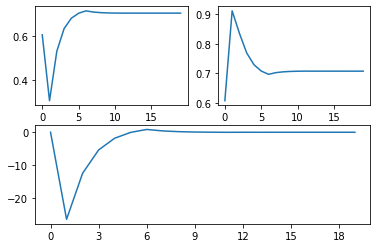

In [7]:
# Plot results
x_values = results[0]
y_values = results[1]
z_values = results[2]
iterations = [i for i in range(max_iter)]

gs = gridspec.GridSpec(2, 2)

fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(iterations, x_values)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(iterations, y_values)

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(iterations, z_values)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))


In [8]:
# Vector mode
def vect(x_init, y_init, z_init, c_mode, max_iterations):
    # Get initial x, y, z values
    x_prev, y_prev, z_prev = x_init, y_init, z_init
    x_values, y_values, z_values = [], [], []

    # Iterate for max iterations
    for i in range(max_iterations):
        # Binary direction variable (xi)
        dir = 1 if np.sign(y_prev) < 0 else -1

        # Determine value to be added to angle accumulator
        if c_mode == Coordinate.CIRCULAR:
            e = math.degrees(math.atan(1/(1 << i)))
        elif c_mode == Coordinate.LINEAR:
            e = 1/(1 << i)
        elif c_mode == Coordinate.HYPERBOLIC:
            if i == 0:
                i = 1
            e = math.atanh(1/(1 << i))

        # Unified CORDIC algorithm
        x = x_prev - c_mode.value * y_prev * dir * (1/(1 << i))
        y = y_prev + x_prev * dir * (1/(1 << i))
        z = z_prev - dir * e

        # Prepare for next iteration step
        x_prev, y_prev, z_prev = x, y, z

        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
        
    return (x_values, y_values, z_values)

In [13]:
# Initial vector components
x_init = 1
y_init = 1
z_init = 0
coordinate = Coordinate.LINEAR
max_iter = 20

results = vect(x_init, y_init, z_init, coordinate, max_iter)
print(results)

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, -0.5, -0.25, -0.125, -0.0625, -0.03125, -0.015625, -0.0078125, -0.00390625, -0.001953125, -0.0009765625, -0.00048828125, -0.000244140625, -0.0001220703125, -6.103515625e-05, -3.0517578125e-05, -1.52587890625e-05, -7.62939453125e-06, -3.814697265625e-06, -1.9073486328125e-06], [1.0, 1.5, 1.25, 1.125, 1.0625, 1.03125, 1.015625, 1.0078125, 1.00390625, 1.001953125, 1.0009765625, 1.00048828125, 1.000244140625, 1.0001220703125, 1.00006103515625, 1.000030517578125, 1.0000152587890625, 1.0000076293945312, 1.0000038146972656, 1.0000019073486328])


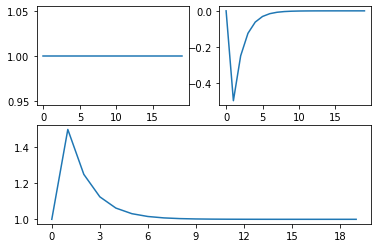

In [14]:
# Plot results
x_values = results[0]
y_values = results[1]
z_values = results[2]
iterations = [i for i in range(max_iter)]

gs = gridspec.GridSpec(2, 2)

fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(iterations, x_values)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(iterations, y_values)

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(iterations, z_values)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))